In [100]:
import pandas as pd

DATA LOADING

In [101]:
df = pd.read_csv(r"C:\Users\Windows 10\Downloads\zomato.csv")

DATA INFO AND DESCRIPTION

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [103]:
df.shape

(51717, 17)

In [104]:
df.count()

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

In [105]:
df.rename(columns={'approx_cost(for two people)':'average_cost'}, inplace=True)

In [106]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'average_cost', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [107]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


NULL VALUES

In [108]:
df.isnull().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
rate                7775
votes                  0
phone               1208
location              21
rest_type            227
dish_liked         28078
cuisines              45
average_cost         346
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [109]:
df = df[df.cuisines.isnull()==False]

In [110]:
df.isnull().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
rate                7741
votes                  0
phone               1179
location               0
rest_type            206
dish_liked         28033
cuisines               0
average_cost         320
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [111]:
df.drop(columns=["url", 'address','phone','listed_in(city)'], inplace  =True)

PREPROCESSING AND VISUALIZATION

In [112]:
df.name.value_counts().head()

name
Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Name: count, dtype: int64

Text(0.5, 1.0, 'Name vs number of Restaurants ')

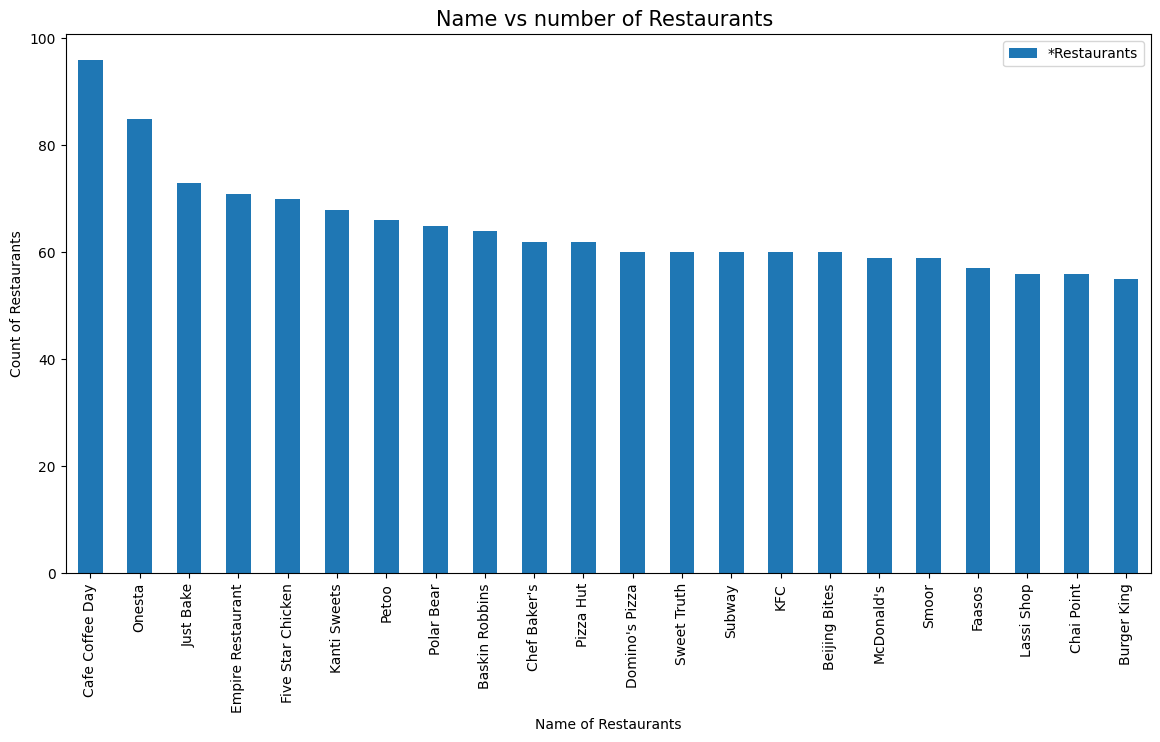

In [113]:
plt.figure(figsize=((14,7)))
a = df.name.value_counts()[:22].plot(kind='bar')
a.legend(['*Restaurants'])
plt.xlabel("Name of Restaurants")
plt.ylabel("Count of Restaurants")
plt.title("Name vs number of Restaurants ",fontsize = 15)

ONLINE ORDER

In [114]:
df.online_order.value_counts()

online_order
Yes    30428
No     21244
Name: count, dtype: int64

what’s most common in Bangalore Restaurants? Do they offer online ordering and table booking?

Text(0.5, 0, 'online orders')

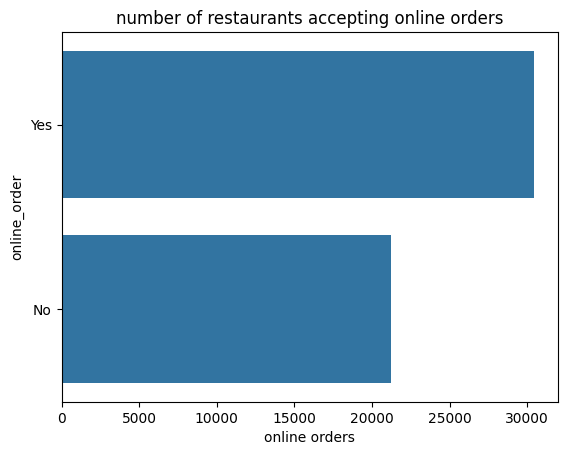

In [115]:
x=sns.countplot(df['online_order'])
plt.title('number of restaurants accepting online orders')
plt.xlabel('online orders')

BOOKING TABLE

In [116]:
df.book_table.value_counts()

book_table
No     45223
Yes     6449
Name: count, dtype: int64

Text(0, 0.5, 'no of restaurants')

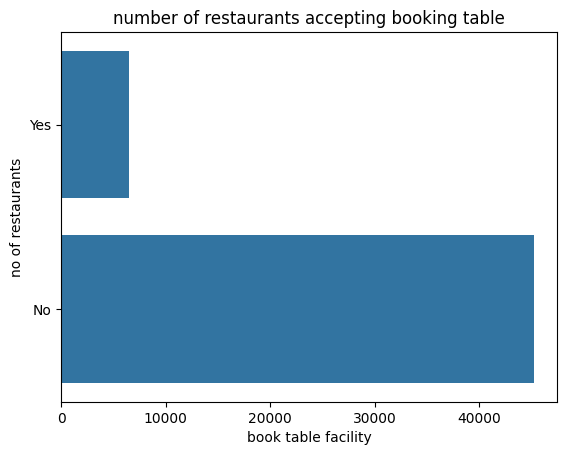

In [117]:
x=sns.countplot(df['book_table'])
plt.title('number of restaurants accepting booking table')
plt.xlabel('book table facility')
plt.ylabel('no of restaurants')

LOCATION

In [118]:
df.location.value_counts()[:10]

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2233
Whitefield               2136
Indiranagar              2081
Jayanagar                1926
Marathahalli             1843
Bannerghatta Road        1630
Bellandur                1286
Name: count, dtype: int64

Text(0.5, 1.0, 'Location')

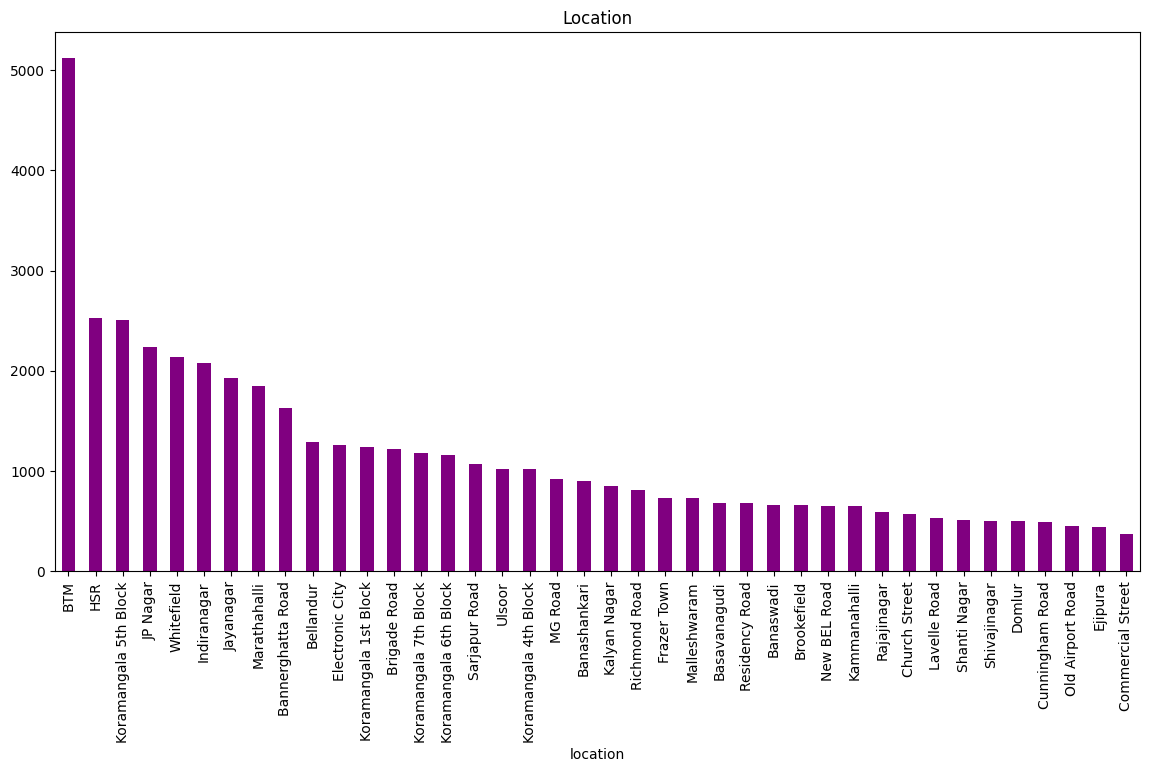

In [119]:
plt.figure(figsize=(14, 7))
df.location.value_counts()[:40].plot(kind='bar', color='purple')
plt.title('Location')

RESTAURANT TYPE

In [120]:
df.rest_type.value_counts()[:15]

rest_type
Quick Bites           19129
Casual Dining         10326
Cafe                   3732
Delivery               2595
Dessert Parlor         2262
Takeaway, Delivery     2035
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           865
Bar                     697
Food Court              623
Sweet Shop              468
Bar, Casual Dining      425
Lounge                  396
Pub                     357
Name: count, dtype: int64

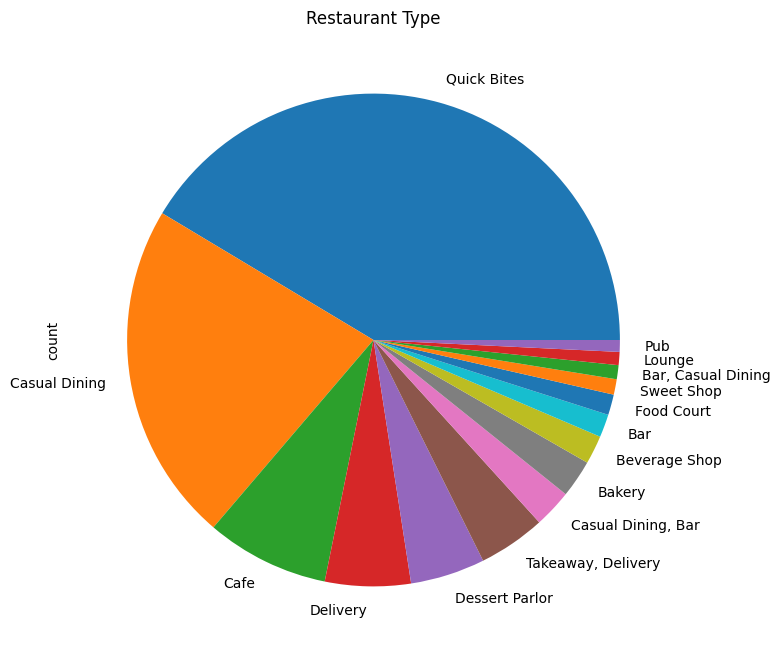

In [121]:
plt.figure(figsize = (14, 8))
df.rest_type.value_counts()[:15].plot(kind = "pie")
plt.title("Restaurant Type")
plt.show()

AVERAGE COST

In [122]:
df.average_cost.value_counts()[:20]

average_cost
300      7576
400      6554
500      4977
200      4855
600      3712
250      2959
800      2285
150      2064
700      1948
350      1763
1,000    1637
450      1417
1,200     993
100       991
1,500     971
650       776
550       761
750       758
900       700
1,300     516
Name: count, dtype: int64

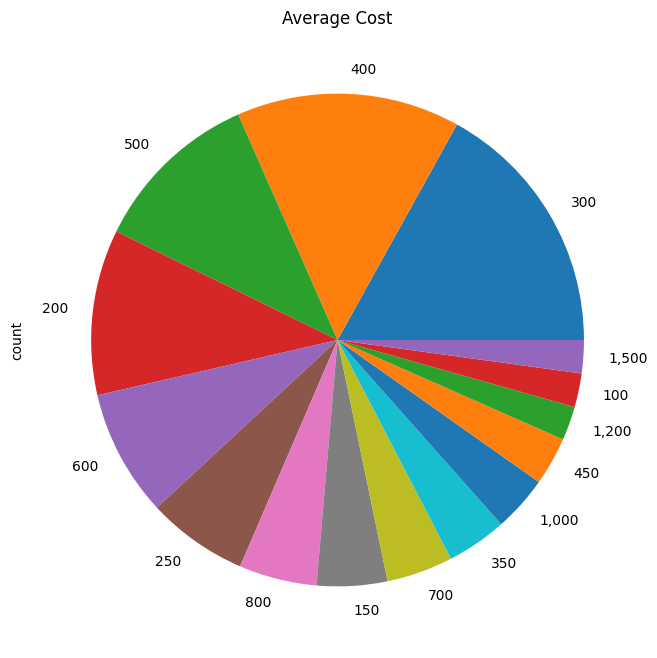

In [123]:
plt.figure(figsize = (14, 8))
df.average_cost.value_counts()[:15].plot(kind = "pie")
plt.title("Average Cost")
plt.show()

DISH LIKED

In [124]:
dishes_data = df[df.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [125]:
dish_count=[]
for i in dishes_data.dish_liked:
    for t in i.split(','):
        t=t.strip()
        dish_count.append(t)

Text(0, 0.5, 'count')

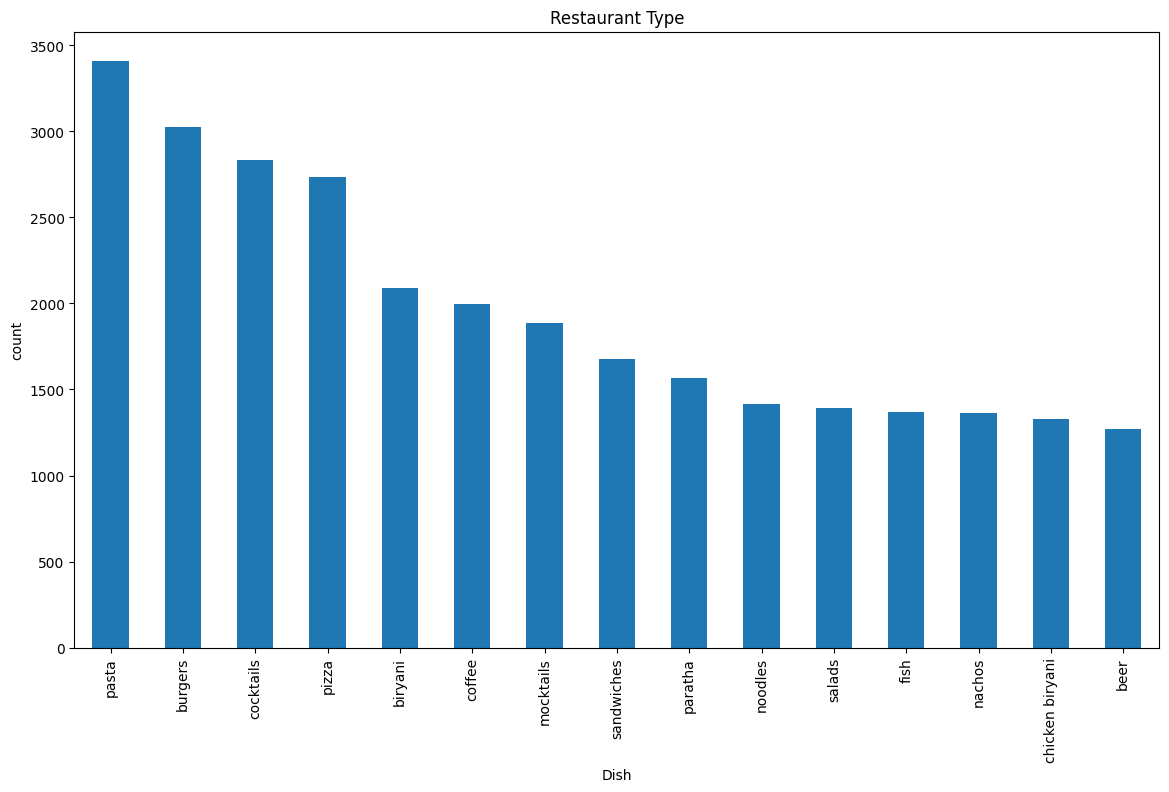

In [126]:
plt.figure(figsize = (14, 8))
pd.Series(dish_count).value_counts()[:15].plot(kind = "bar")
plt.title("Restaurant Type")
plt.xlabel('Dish')
plt.ylabel('count')

RATE

In [127]:
df['rate'] = df['rate'].replace('NEW',np.NaN)
df['rate'] = df['rate'].replace('-',np.NaN)
df.dropna(how = 'any', inplace = True)

In [128]:
df['rate'] = df.loc[:,'rate'].replace('[ ]','',regex = True)
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda r: r.replace('/5',''))
df['rate'] = df['rate'].apply(lambda r: float(r))

3.9058343007008034


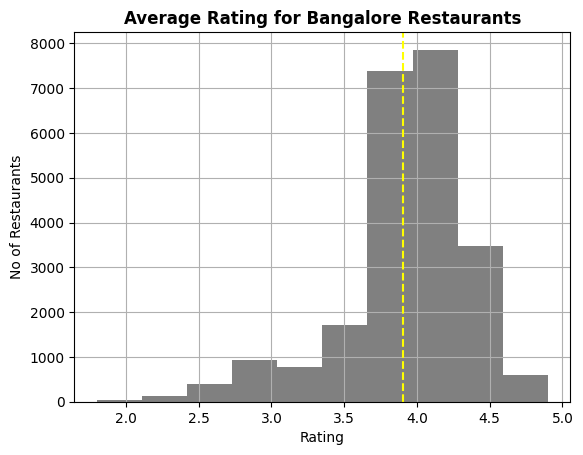

In [129]:
df.rate.hist(color='grey')
plt.axvline(x= df.rate.mean(),ls='--',color='yellow')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(df.rate.mean())

RESTAURANT TYPE VS RATING

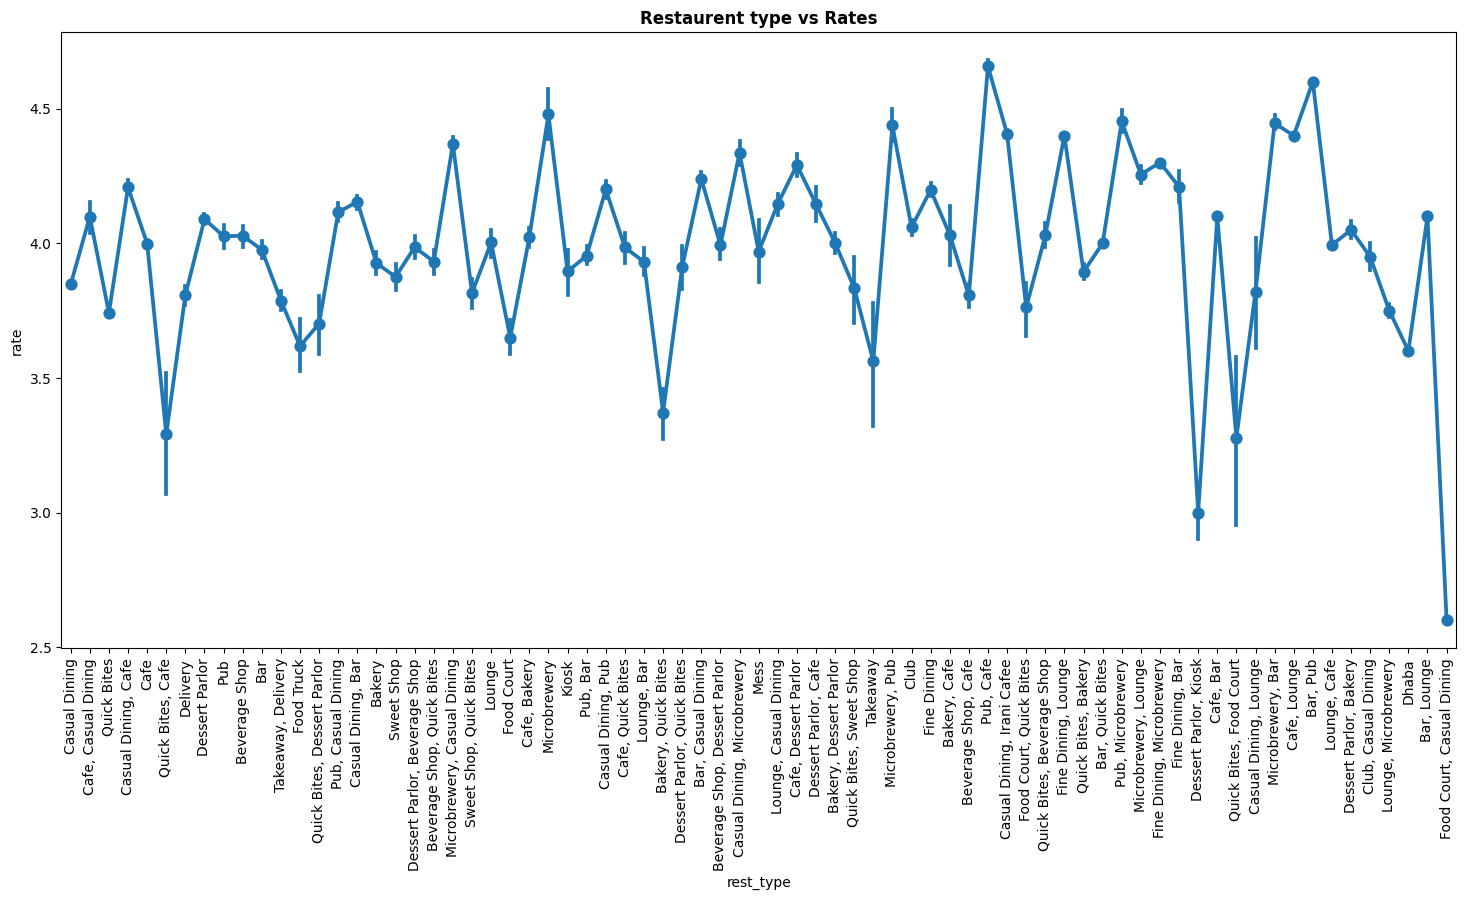

In [130]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=df["rest_type"], y=df["rate"], data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rates', weight = 'bold')
plt.show()

CUISINES

In [131]:
cuisines_data = df[df.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [132]:
cuisines_count= []
for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

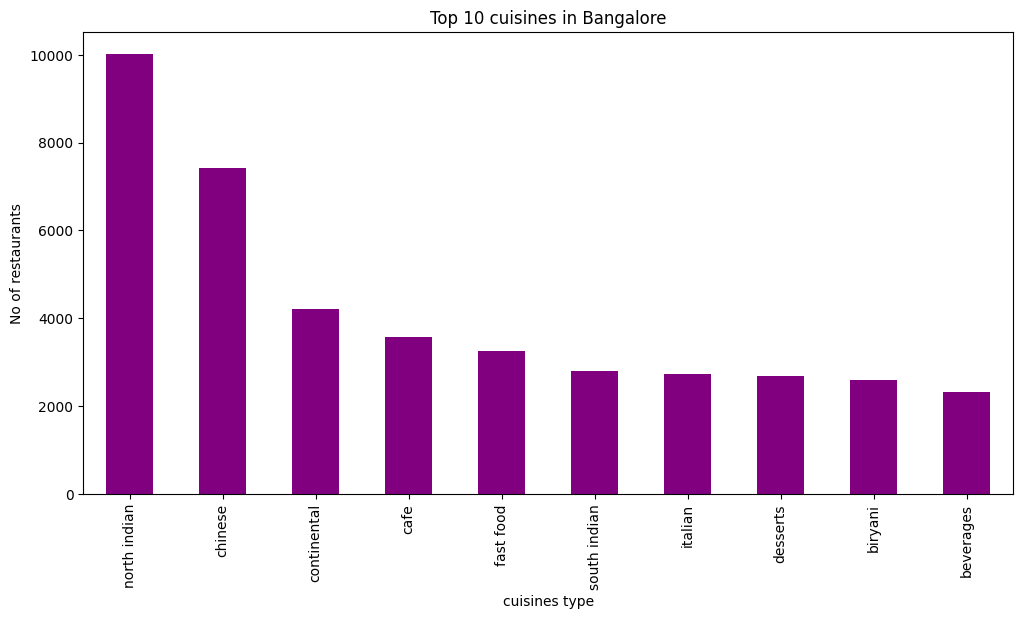

In [133]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'Purple')
plt.title('Top 10 cuisines in Bangalore')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

Text(0.5, 1.0, 'rates vs oline order')

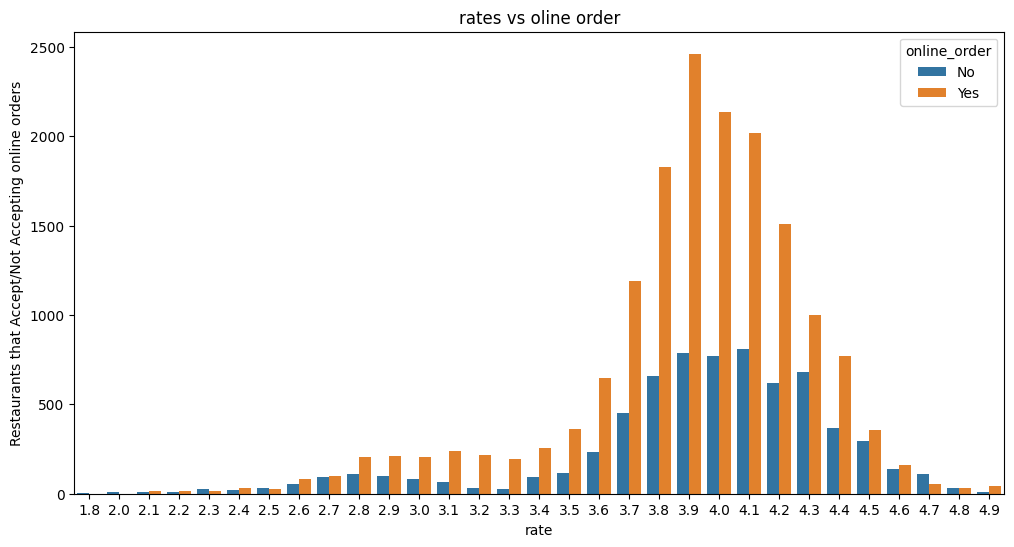

In [134]:
plt.figure(figsize = (12,6))
sns.countplot(x=df['rate'], hue = df['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rates vs oline order")

MODEL BUILDING

In [135]:
df['online_order']= pd.get_dummies(df.online_order, drop_first=True)
df['book_table']= pd.get_dummies(df.book_table, drop_first=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type)
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,True,True,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars
51707,M Bar - Bengaluru Marriott Hotel Whitefield,False,False,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars
51708,Keys Cafe - Keys Hotel,False,False,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars
51711,Bhagini,False,False,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars


In [136]:
df.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)

In [137]:
df['rest_type'] = df['rest_type'].str.replace(',' , '') 
df['rest_type'] = df['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['rest_type'].value_counts().head()

rest_type
Casual Dining        7331
Bites Quick          5253
Cafe                 2375
Bar Casual Dining    1321
Dessert Parlor       1083
Name: count, dtype: int64

In [138]:
df['cuisines'] = df['cuisines'].str.replace(',' , '') 
df['cuisines'] = df['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['cuisines'].value_counts().head()

cuisines
Indian North                         1152
Chinese Indian North                  852
Chinese Indian Indian North South     455
Indian South                          366
Cream Desserts Ice                    334
Name: count, dtype: int64

LABEL ENCODING

In [139]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
df['location'] = T.fit_transform(df['location'])
df['rest_type'] = T.fit_transform(df['rest_type'])
df['cuisines'] = T.fit_transform(df['cuisines'])

In [140]:
df["average_cost"] = df["average_cost"].str.replace(',' , '') 

In [141]:
df["average_cost"] = df["average_cost"].astype('float')

In [142]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,True,True,4.1,775,1,29,951,800.0
1,Spice Elephant,True,False,4.1,787,1,29,963,800.0
2,San Churro Cafe,True,False,3.8,918,1,22,806,800.0
3,Addhuri Udupi Bhojana,False,False,3.7,88,1,19,1201,300.0
4,Grand Village,False,False,3.8,166,4,29,1237,600.0


In [143]:
x = df.drop(['rate','name'],axis = 1)

In [144]:
y = df['rate']

In [145]:
x.shape

(23259, 7)

In [146]:
y.shape

(23259,)

SPLITTING DATA FOR MODEL BUILDING

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23259 entries, 0 to 51715
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23259 non-null  object 
 1   online_order  23259 non-null  bool   
 2   book_table    23259 non-null  bool   
 3   rate          23259 non-null  float64
 4   votes         23259 non-null  int64  
 5   location      23259 non-null  int32  
 6   rest_type     23259 non-null  int32  
 7   cuisines      23259 non-null  int32  
 8   average_cost  23259 non-null  float64
dtypes: bool(2), float64(2), int32(3), int64(1), object(1)
memory usage: 1.2+ MB


In [149]:
from sklearn.preprocessing import StandardScaler
num_values1=df.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(df[num_values1])
df[num_values1]=scaler.transform(df[num_values1])

In [150]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,True,True,0.455722,0.152328,1,29,951,0.089176
1,Spice Elephant,True,False,0.455722,0.163105,1,29,963,0.089176
2,San Churro Cafe,True,False,-0.248401,0.280757,1,22,806,0.089176
3,Addhuri Udupi Bhojana,False,False,-0.483109,-0.464668,1,19,1201,-0.871467
4,Grand Village,False,False,-0.248401,-0.394616,4,29,1237,-0.295081


MODEL 1 Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(X_train,y_train) 
y_pred_lr = lr.predict(X_test)

In [152]:
lr.score(X_test, y_test)*100

21.076424408263183

MODEL 2 Random Forest

In [153]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [154]:
rfr.score(X_test,y_test)*100

91.03313748519184

MODEL 3 Lasso Regression

In [155]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,y_train)
y_pred_ls = ls.predict(X_test)

In [156]:
ls.score(X_test,y_test)*100

18.05145407448734

CONCLUSION : Out of 3 model RANDOM FOREST has yield maximum accuracy

Comparision of ACTUAL and PREDICTED VALUES

RANDOM FOREST REGRESSOR PREDICTION

In [157]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
26296,4.0,3.815800
2577,3.3,3.300000
9737,4.0,3.991000
42192,3.9,4.065000
38504,4.0,4.000000
...,...,...
40535,4.6,4.591333
43929,4.2,4.200000
4802,4.2,4.204000
10230,3.7,3.702000
